In [331]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [332]:
data = pd.read_csv("2018.csv")

In [333]:
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [334]:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [336]:
data.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.991749,-0.805897,-0.737500,-0.778700,-0.530786,-0.103602,-0.371133
Score,-0.991749,1.000000,0.802124,0.745760,0.775814,0.544280,0.135825,0.405292
GDP per capita,-0.805897,0.802124,1.000000,0.672080,0.844273,0.332275,-0.011241,0.319582
Social support,-0.737500,0.745760,0.672080,1.000000,0.667288,0.411087,0.018226,0.218364
Healthy life expectancy,-0.778700,0.775814,0.844273,0.667288,1.000000,0.355475,0.020751,0.315569
Freedom to make life choices,-0.530786,0.544280,0.332275,0.411087,0.355475,1.000000,0.297988,0.462446
Generosity,-0.103602,0.135825,-0.011241,0.018226,0.020751,0.297988,1.000000,0.362249
Perceptions of corruption,-0.371133,0.405292,0.319582,0.218364,0.315569,0.462446,0.362249,1.000000


In [337]:
x = data['Generosity']
x

0      0.202
1      0.286
2      0.284
3      0.353
4      0.256
       ...  
151    0.083
152    0.270
153    0.224
154    0.218
155    0.149
Name: Generosity, Length: 156, dtype: float64

In [338]:
y = data['Score']
y

0      7.632
1      7.594
2      7.555
3      7.495
4      7.487
       ...  
151    3.355
152    3.303
153    3.254
154    3.083
155    2.905
Name: Score, Length: 156, dtype: float64

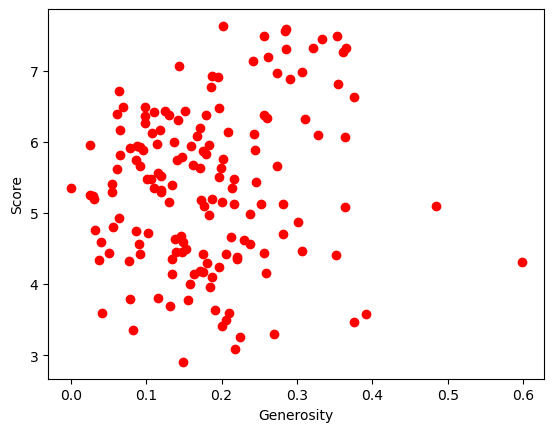

In [339]:
plt.scatter(x,y, c='red')
plt.xlabel("Generosity")
plt.ylabel("Score")
plt.show()

In [340]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [341]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(124,)
(32,)
(124,)
(32,)


In [342]:
x_train = x_train.values.reshape(-1,1)

In [343]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [344]:
x_test = x_test.values.reshape(-1,1)

In [345]:
model.fit(x_test,y_test)
model.score(x_test,y_test)

0.01623481625805867

In [346]:
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

Intercept: 5.013574253181054
Slope: [1.80400933]


In [347]:
y_pred = model.intercept_ + model.coef_*x_test
print(f"y_pred \n: {y_pred}")

y_pred 
: [[5.26433155]
 [5.45736055]
 [5.17232707]
 [5.47540064]
 [5.26974358]
 [5.38880819]
 [5.5060688 ]
 [5.4284964 ]
 [5.15609099]
 [5.39241621]
 [5.37437612]
 [5.01357425]
 [5.40324027]
 [5.37618013]
 [5.24809547]
 [5.61430936]
 [5.64858554]
 [5.36716008]
 [5.34911999]
 [5.33649192]
 [5.32927589]
 [5.25170348]
 [5.2931957 ]
 [5.12903085]
 [5.46998861]
 [5.22283934]
 [5.3328839 ]
 [5.45194852]
 [5.38520017]
 [5.31484381]
 [5.52230488]
 [5.29860773]]


In [348]:
x1= data['Freedom to make life choices']
x1

0      0.681
1      0.686
2      0.683
3      0.677
4      0.660
       ...  
151    0.244
152    0.481
153    0.112
154    0.305
155    0.065
Name: Freedom to make life choices, Length: 156, dtype: float64

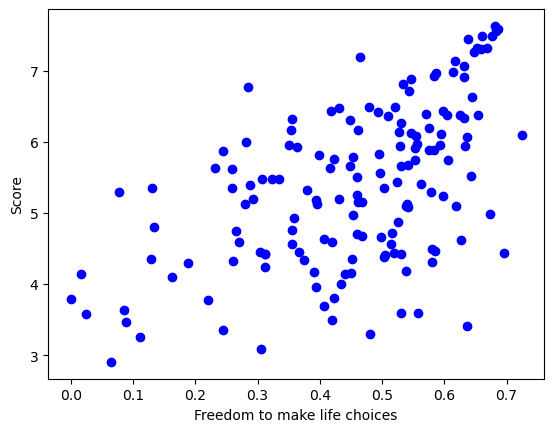

In [349]:
plt.scatter(x1,y,c='blue')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
plt.show()

In [350]:
x1_train, x1_test, y_train, y_test = train_test_split(x1,y,test_size=0.2,random_state=1)

In [351]:
print(x1_train.shape)
print(x1_test.shape)
print(y_train.shape)
print(y_test.shape)

(124,)
(32,)
(124,)
(32,)


In [352]:
x1_test = x1_test.values.reshape(-1,1)

In [353]:
model1 = LinearRegression()
model1.fit(x1_test,y_test)
model1.score(x1_test,y_test)

0.05897612626358284

In [354]:
print(f"Intercept is: {model1.intercept_}")
print(f"Slope is: {model1.coef_}")

Intercept is: 4.443215240751754
Slope is: [1.90004003]


In [355]:
y1_pred = model1.intercept_ + model1.coef_*x1_test
print(f"y1_pred: {y1_pred}")

y1_pred: [[5.14052993]
 [5.43883622]
 [5.44643638]
 [5.68584142]
 [5.29633322]
 [5.44453634]
 [5.5566387 ]
 [5.6326403 ]
 [5.49393738]
 [5.4521365 ]
 [5.6516407 ]
 [4.69212048]
 [4.97522645]
 [5.32103374]
 [5.33243398]
 [5.65544078]
 [5.40083542]
 [5.64404054]
 [4.98282661]
 [5.59083942]
 [4.90682501]
 [5.21463149]
 [4.86312409]
 [5.12532961]
 [5.19373105]
 [5.3856351 ]
 [5.61743998]
 [5.57183902]
 [5.4521365 ]
 [5.49583742]
 [5.31533362]
 [5.26783261]]


In [356]:
xmulti = data.iloc[:,3:6]
xmulti

,GDP per capita,Social support,Healthy life expectancy
0,1.305,1.592,0.874
1,1.456,1.582,0.861
2,1.351,1.590,0.868
3,1.343,1.644,0.914
4,1.420,1.549,0.927
...,...,...,...
151,0.442,1.073,0.343
152,0.455,0.991,0.381
153,0.337,0.608,0.177
154,0.024,0.000,0.010


In [357]:
xmulti_train, xmulti_test, y_train, y_test = train_test_split(xmulti, y, test_size=0.2, random_state = 1)

In [358]:
print(xmulti_train.shape)
print(xmulti_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 3)
(32, 3)
(124,)
(32,)


In [359]:
modelm = LinearRegression()
modelm.fit(xmulti_test,y_test)
modelm.score(xmulti_test,y_test)

0.7667812201092875

In [360]:
print(f"Intercept: {modelm.intercept_}")
print(f"slope: {modelm.coef_}")

Intercept: 2.5683505615348445
slope: [ 1.52319243  1.14897506 -0.01656893]


In [362]:
ym_pred = modelm.intercept_ + modelm.coef_*xmulti_test
print(f"ym_pred is : {ym_pred}")

ym_pred is :      GDP per capita  Social support  Healthy life expectancy
117        3.131932        3.985037                 2.565832
75         4.708436        4.050528                 2.551285
51         4.268233        3.968951                 2.556322
31         5.080095        4.065465                 2.555957
35         4.473864        4.335474                 2.552362
40         3.585843        4.083849                 2.556752
14         4.609428        4.261940                 2.554085
109        3.665049        3.756391                 2.561044
53         4.539362        4.248152                 2.551980
146        2.851664        3.189946                 2.563280
150        3.074050        3.597832                 2.561723
78         4.326115        3.949419                 2.553786
92         3.962072        3.806946                 2.555791
90         3.617830        3.914949                 2.567555
89         3.820415        4.021804                 2.557664
5          